In [1]:
# MNIST - https://www.kaggle.com/datasets/hojjatk/mnist-dataset
data_dir = '/Users/rytis/Desktop/EU_parama/data/mnist/'

In [2]:
import numpy as np
from array import array
import struct
from os.path  import join
import random
import matplotlib.pyplot as plt

In [3]:
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)     

In [4]:
input_path = data_dir
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

In [5]:
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap='viridis')
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

In [6]:
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

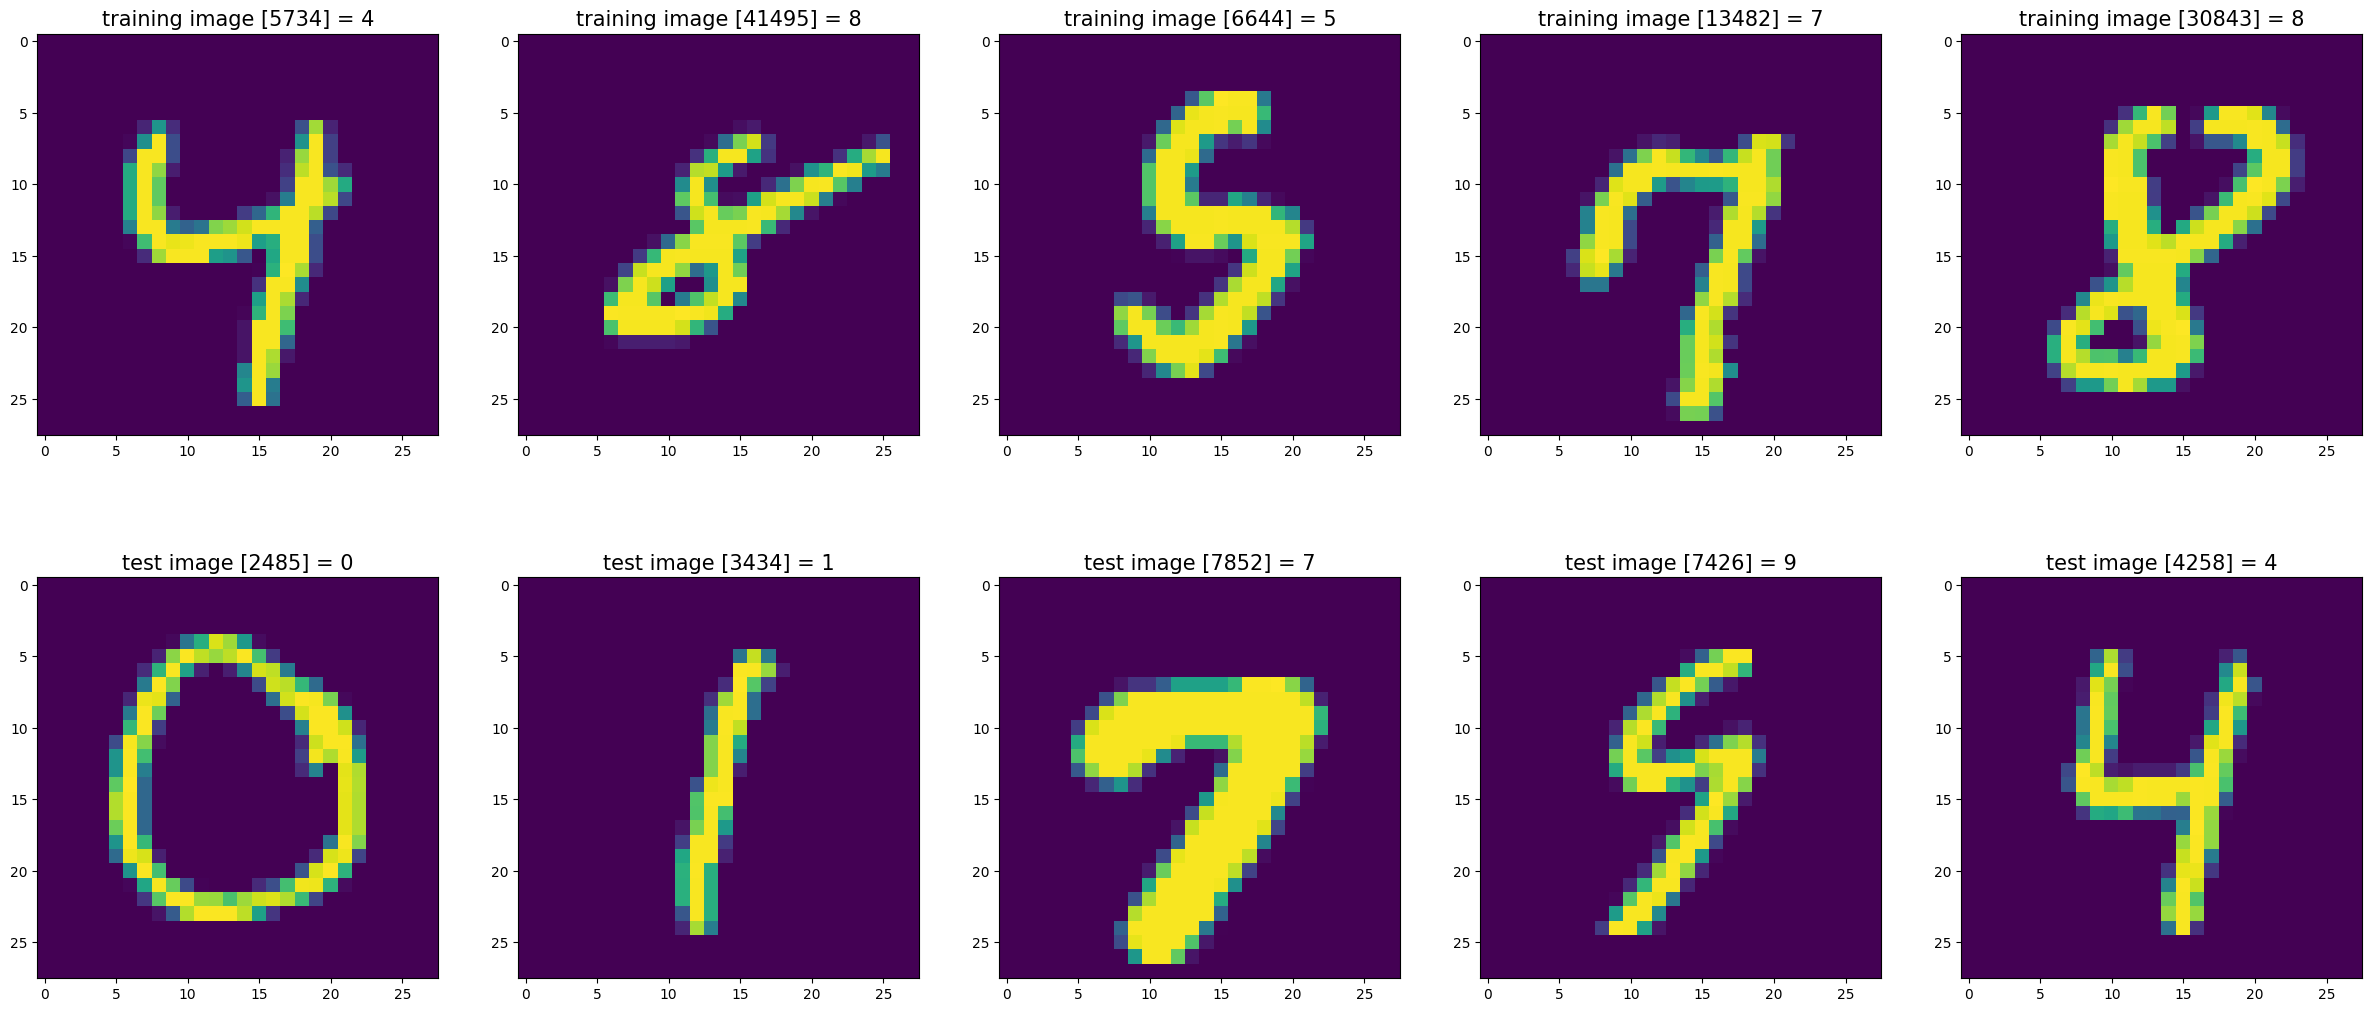

In [7]:
images_show = []
titles_show = []
for i in range(0, 5):
    r = random.randint(1, 60000)
    images_show.append(x_train[r])
    titles_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_show.append(x_test[r])        
    titles_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_show, titles_show)

In [8]:
def plot_distribution(subset_name, class_counts, class_labels):
    plt.figure(figsize=(10, 6))

    # Add grid lines on x, y
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.grid(axis='y', linestyle='--', alpha=0.5)

    # Create a bar plot
    bars = plt.bar(class_labels, class_counts)

    # Add count text on top of the bars
    for bar, count in zip(bars, class_counts):
        plt.text(bar.get_x() + bar.get_width() / 2, count, str(count),
                 ha='center', va='bottom')

    plt.xticks(class_labels)
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.title(f"{subset_name} class distribution")
    plt.show()

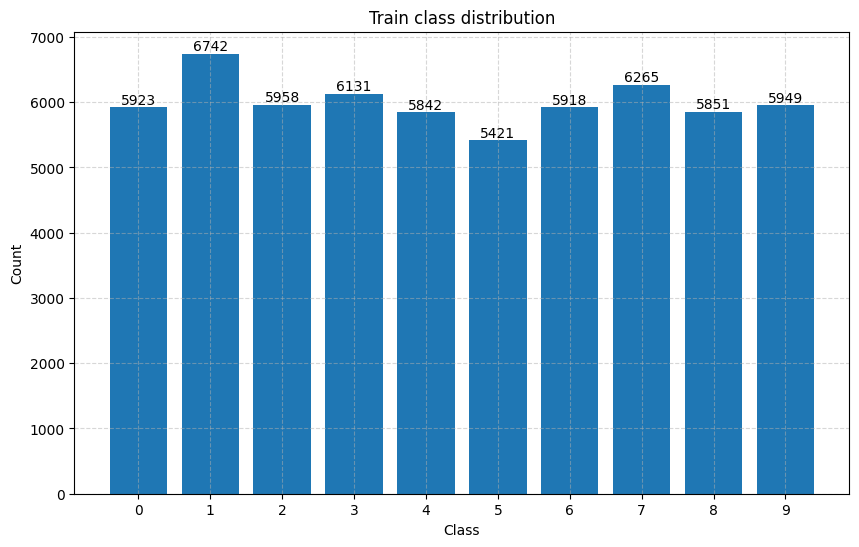

In [9]:
# Class distribution for train subset
train_class_counts = np.bincount(y_train)
train_class_labels = np.unique(y_train)
plot_distribution('Train', train_class_counts, train_class_labels)

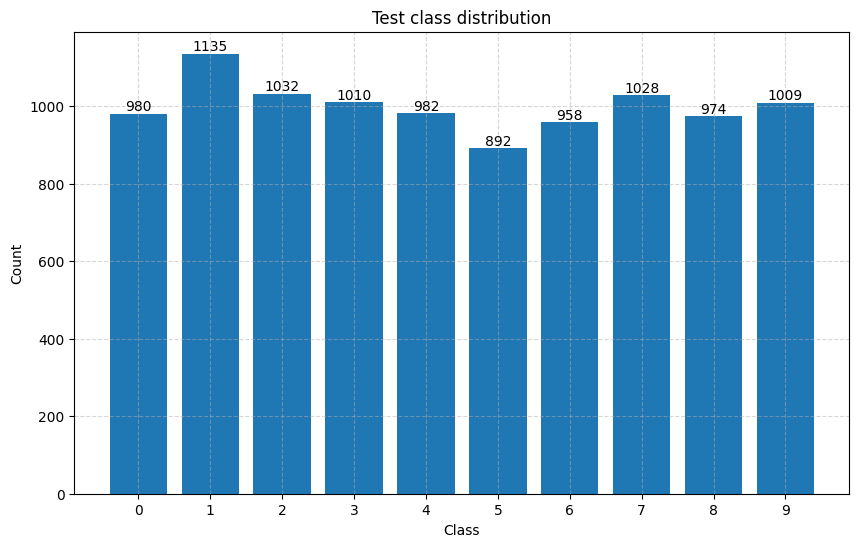

In [10]:
# Class distribution for test subset
test_class_counts = np.bincount(y_test)
test_class_labels = np.unique(y_test)
plot_distribution('Test', test_class_counts, test_class_labels)

In [11]:
# Feature analysis (pixel intensity distribution for the whole dataset)
def draw_pixel_distribution(subset_name, data, grouping=30):
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=grouping, range=(0, 256))
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.title(f"{subset_name} pixel intensity distribution [bins={grouping}]")
    # Add grid lines on x, y
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

In [12]:
# cast list of list to np.array
x_train = [np.array(sublist) for sublist in x_train]
x_test = [np.array(sublist) for sublist in x_test]

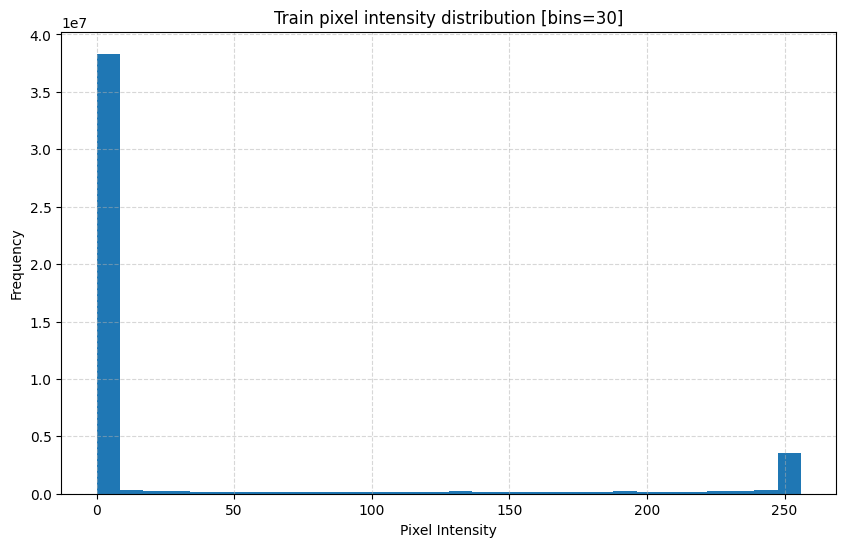

In [13]:
# draw pixel distribution for train
draw_pixel_distribution('Train', np.concatenate(x_train).flatten())

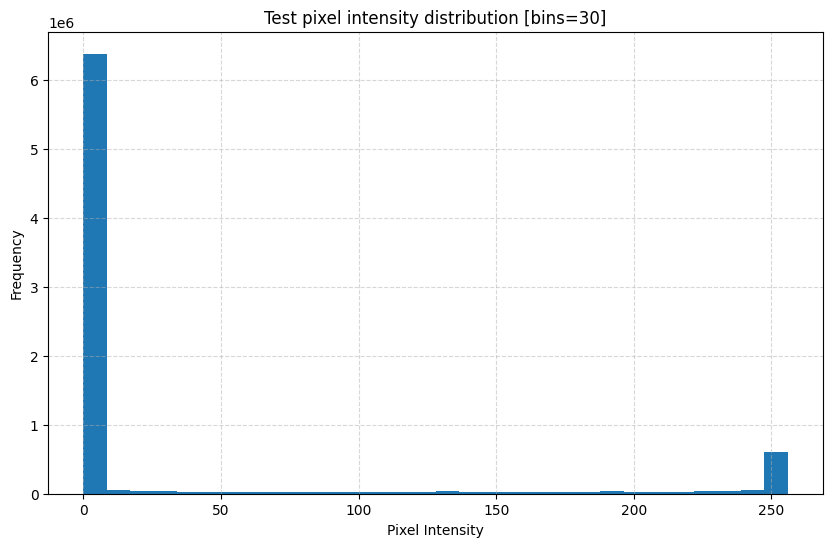

In [14]:
# draw pixel distribution for test
draw_pixel_distribution('Test', np.concatenate(x_test).flatten())

In [15]:
# isolation forest for abnormality in histogram
from sklearn.ensemble import IsolationForest
import cv2

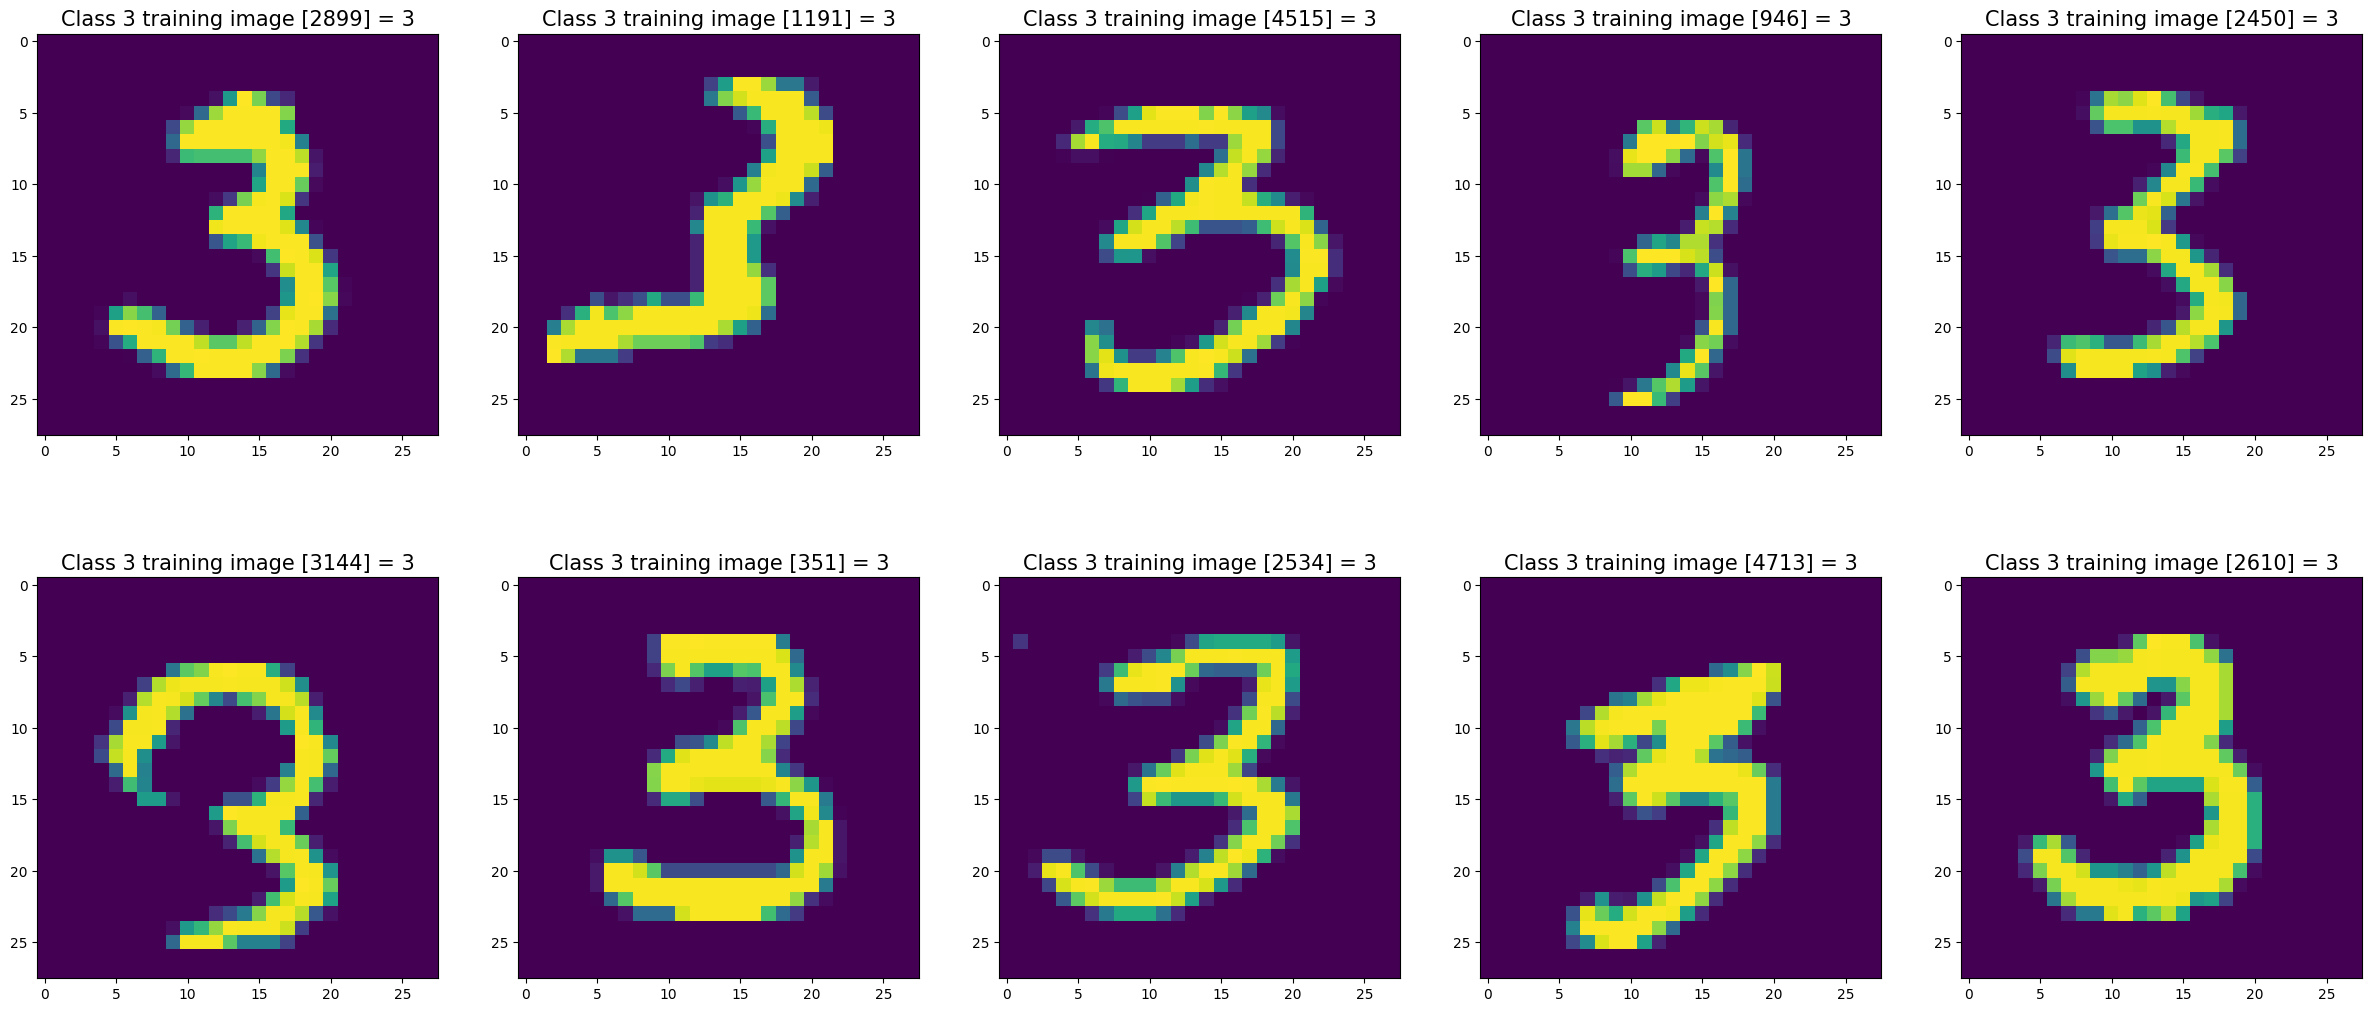

In [16]:
# take out classes one by one
desired_class = 3
# find indices where the value occurs
indices = [i for i, x in enumerate(y_train) if x == desired_class]
# get values of these classes
desired_class_x = [x_train[i] for i in indices]
# create list with annotations
desired_class_y = [desired_class] * len(desired_class_x)
# show few elements
images_show = []
titles_show = []
for i in range(0, 10):
    r = random.randint(1, len(desired_class_x))
    images_show.append(desired_class_x[r])
    titles_show.append('Class ' + str(desired_class_y[r]) + ' training image [' + str(r) + '] = ' + str(desired_class_y[r])) 
    
show_images(images_show, titles_show)

Noisy images: [1086, 1244, 3423, 1734, 2519]


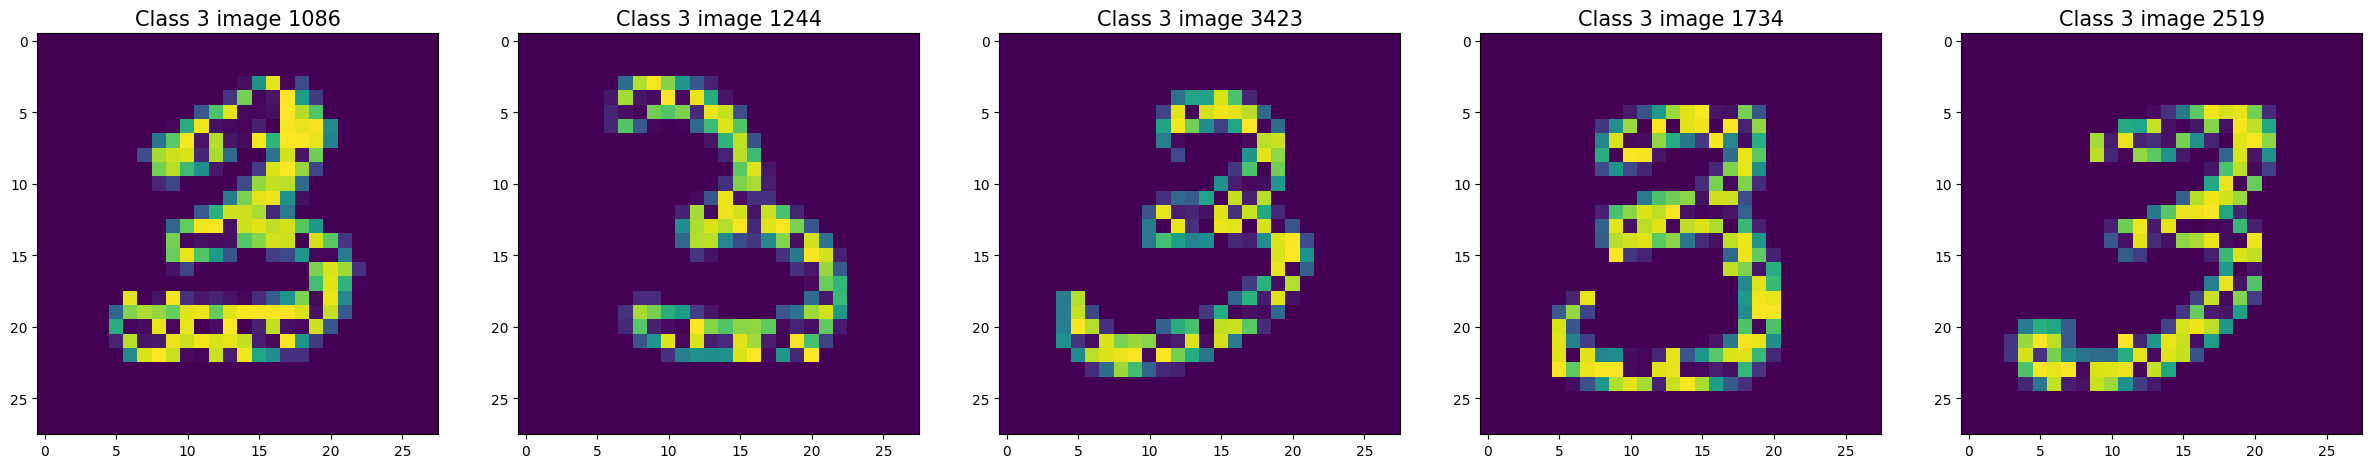

In [17]:
# randomly select defined number of image and introduce noise in the digits
noisy_image_count = 5
indices_for_noise = random.sample(range(len(desired_class_x)), noisy_image_count)

images_show = []
titles_show = []

print(f'Noisy images: {indices_for_noise}')
for i in indices_for_noise:
    # Create a binary mask to identify non-zero pixels
    foreground_mask = (desired_class_x[i] > 0).astype(np.uint8)

    # Define the parameters for Gaussian noise
    mean = 1
    stddev = 15  # Adjust this value to control the noise level

    # Generate Gaussian noise for the foreground
    noise = np.random.normal(mean, stddev, desired_class_x[i].shape).astype(np.uint8)
    noisy_foreground = np.where(foreground_mask == 1, desired_class_x[i] + noise, 0)

    # Combine the noisy foreground with the original image
    desired_class_x[i] = np.where(foreground_mask == 1, noisy_foreground, desired_class_x[i])
    
    # to visualize
    images_show.append(desired_class_x[i])
    titles_show.append('Class ' + str(desired_class) + ' image ' + str(i))                       
show_images(images_show, titles_show)

In [18]:
# image data to histogram
bins = 30
desired_class_x_histograms = [cv2.calcHist([image], [0], None, [bins], [0, bins]).flatten() for image in desired_class_x]

In [19]:
# Create an Isolation Forest model
isolation_forest = IsolationForest(contamination='auto', n_estimators=1000, max_features=10, random_state=99)

# Fit the model on the data
isolation_forest.fit(desired_class_x_histograms)

IsolationForest(max_features=10, n_estimators=1000, random_state=99)

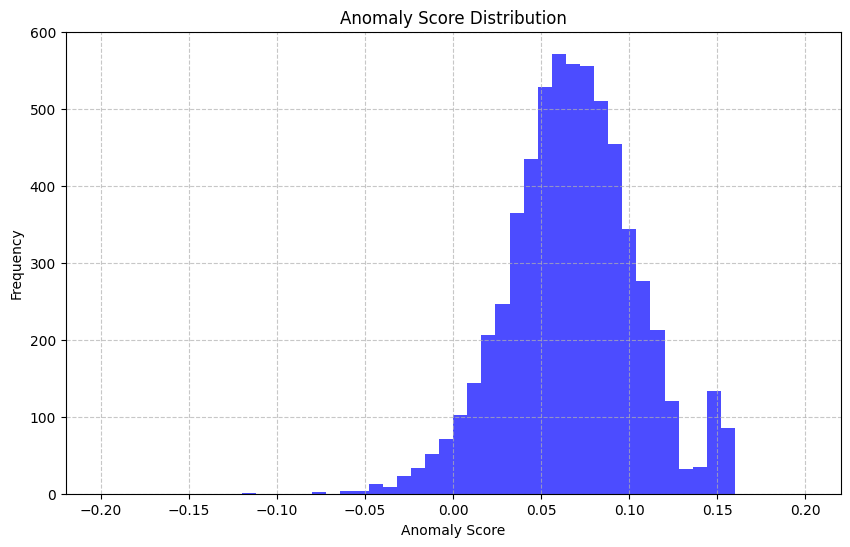

In [20]:
# Predict the anomaly score for each data point
anomaly_scores = isolation_forest.decision_function(desired_class_x_histograms)

# Visualize the anomaly scores
plt.figure(figsize=(10, 6))
plt.hist(anomaly_scores, bins=50, range=(-0.2, 0.2), color='blue', alpha=0.7)
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.title("Anomaly Score Distribution")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [21]:
# get sorting indices from the smallest (biggest anomaly)
anomaly_score_indices = np.argsort(anomaly_scores)
print(anomaly_score_indices)

[1086 1244 1734 ... 5692 2347 3869]


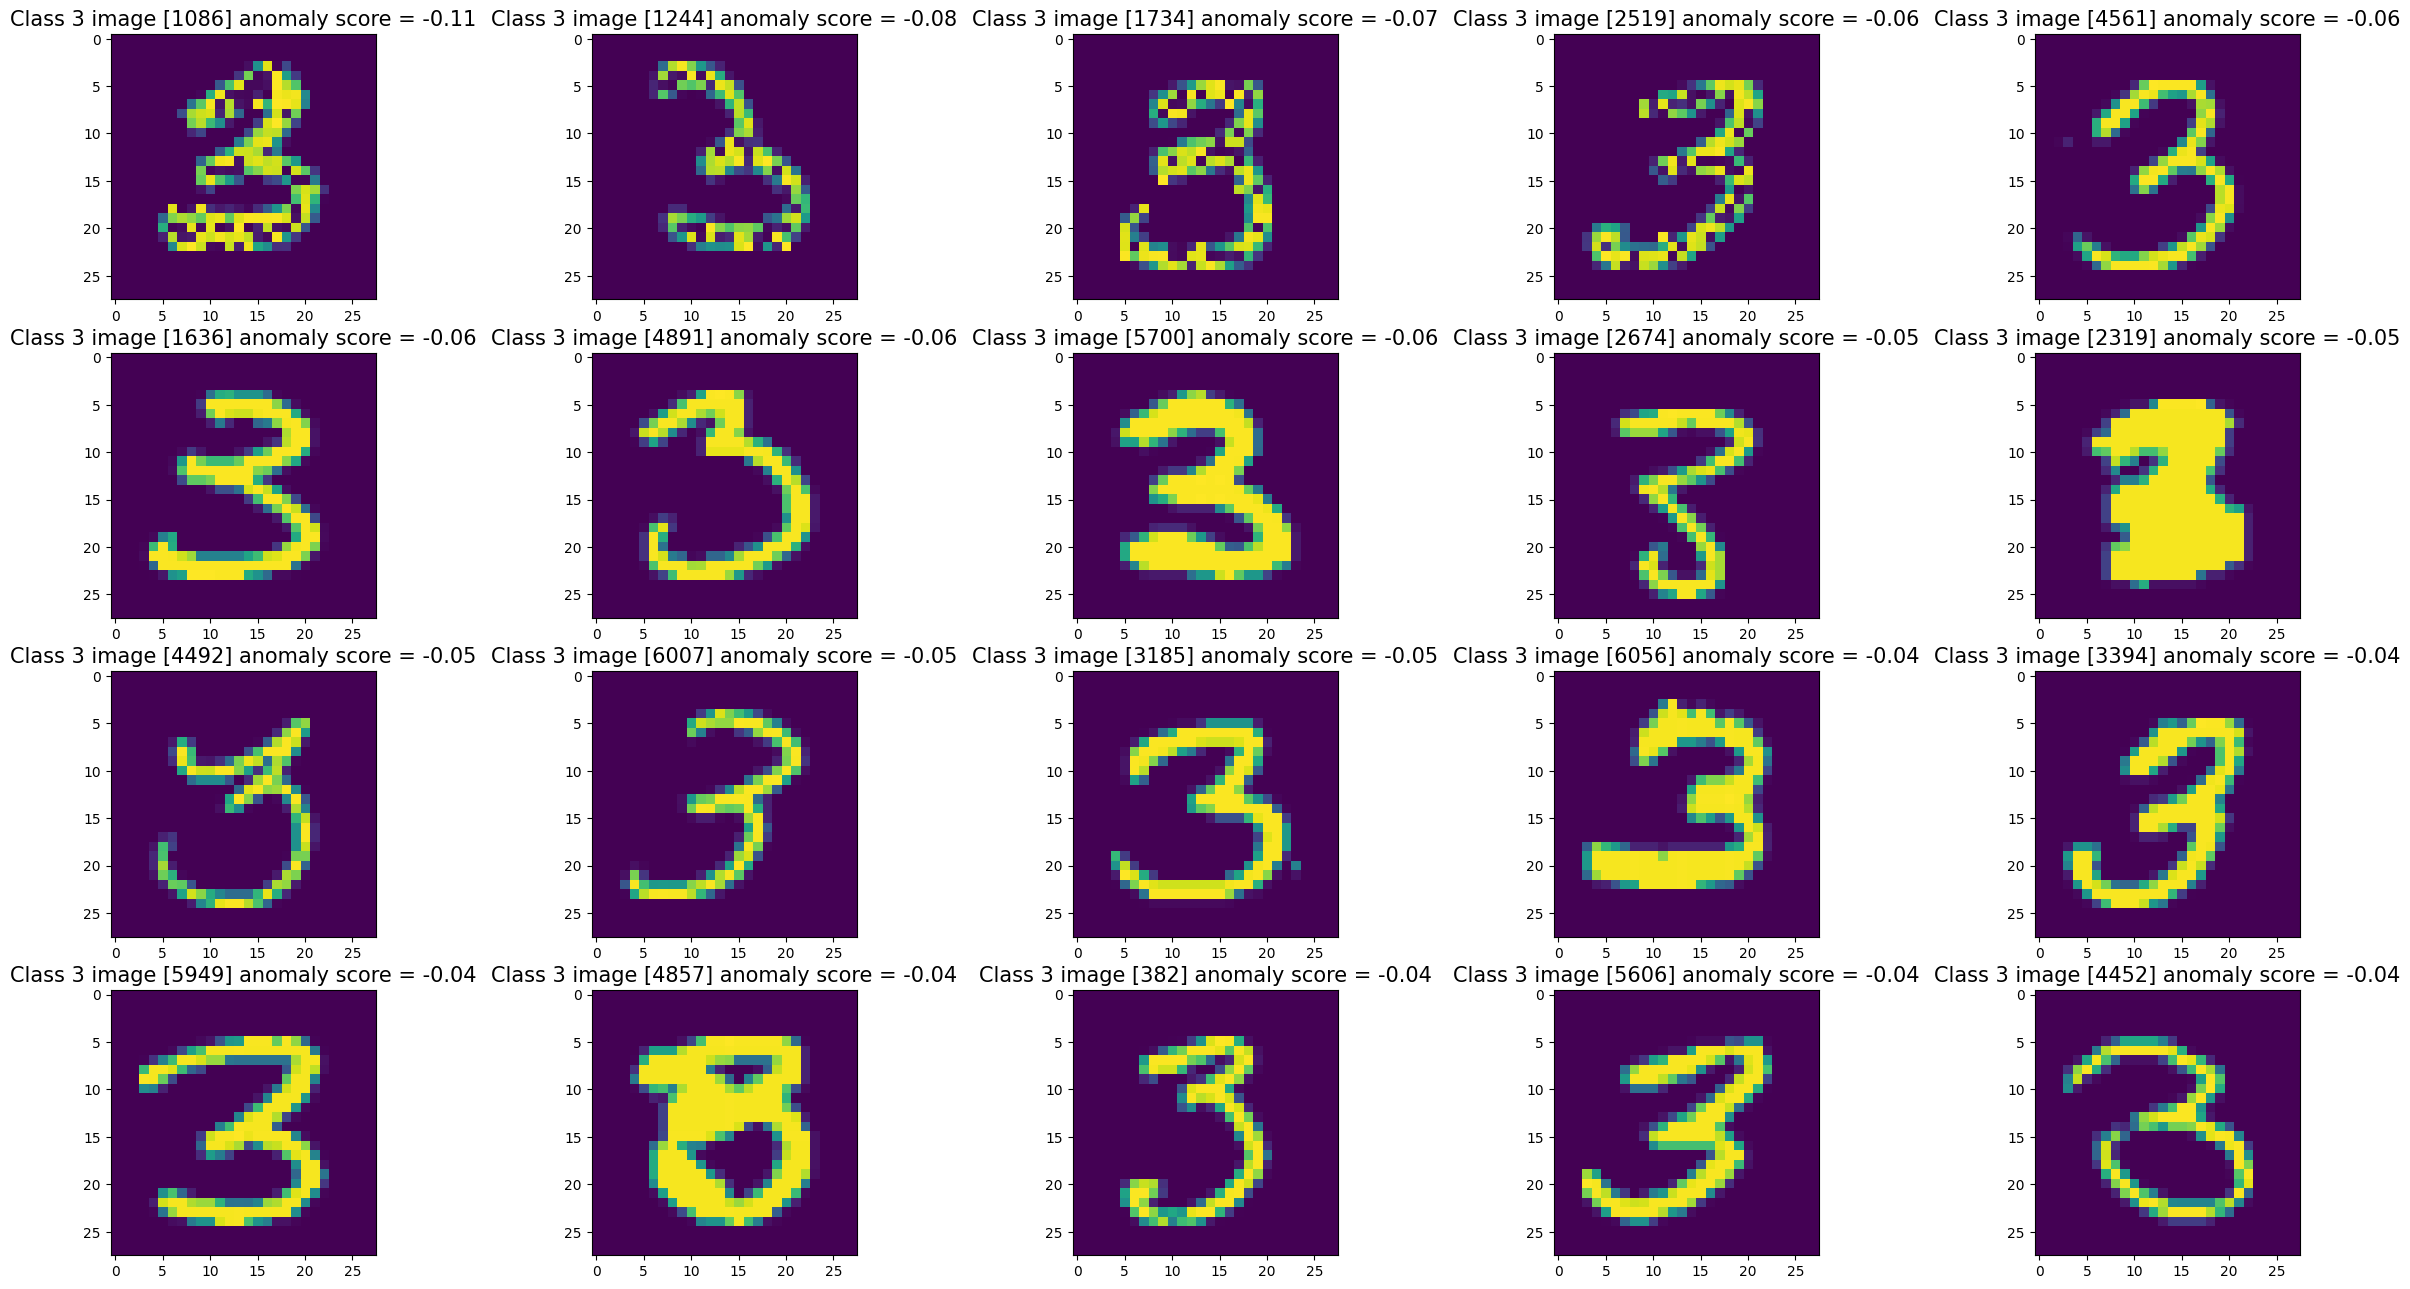

In [22]:
# lets print some images with most anomaly
images_show = []
titles_show = []
for i in range(0, 20):
    index = anomaly_score_indices[i]
    images_show.append(desired_class_x[index])
    titles_show.append('Class ' + str(desired_class) + ' image [' + str(index) + '] anomaly score = ' + "{:.2f}".format(round(anomaly_scores[index], 2))) 
    
show_images(images_show, titles_show)

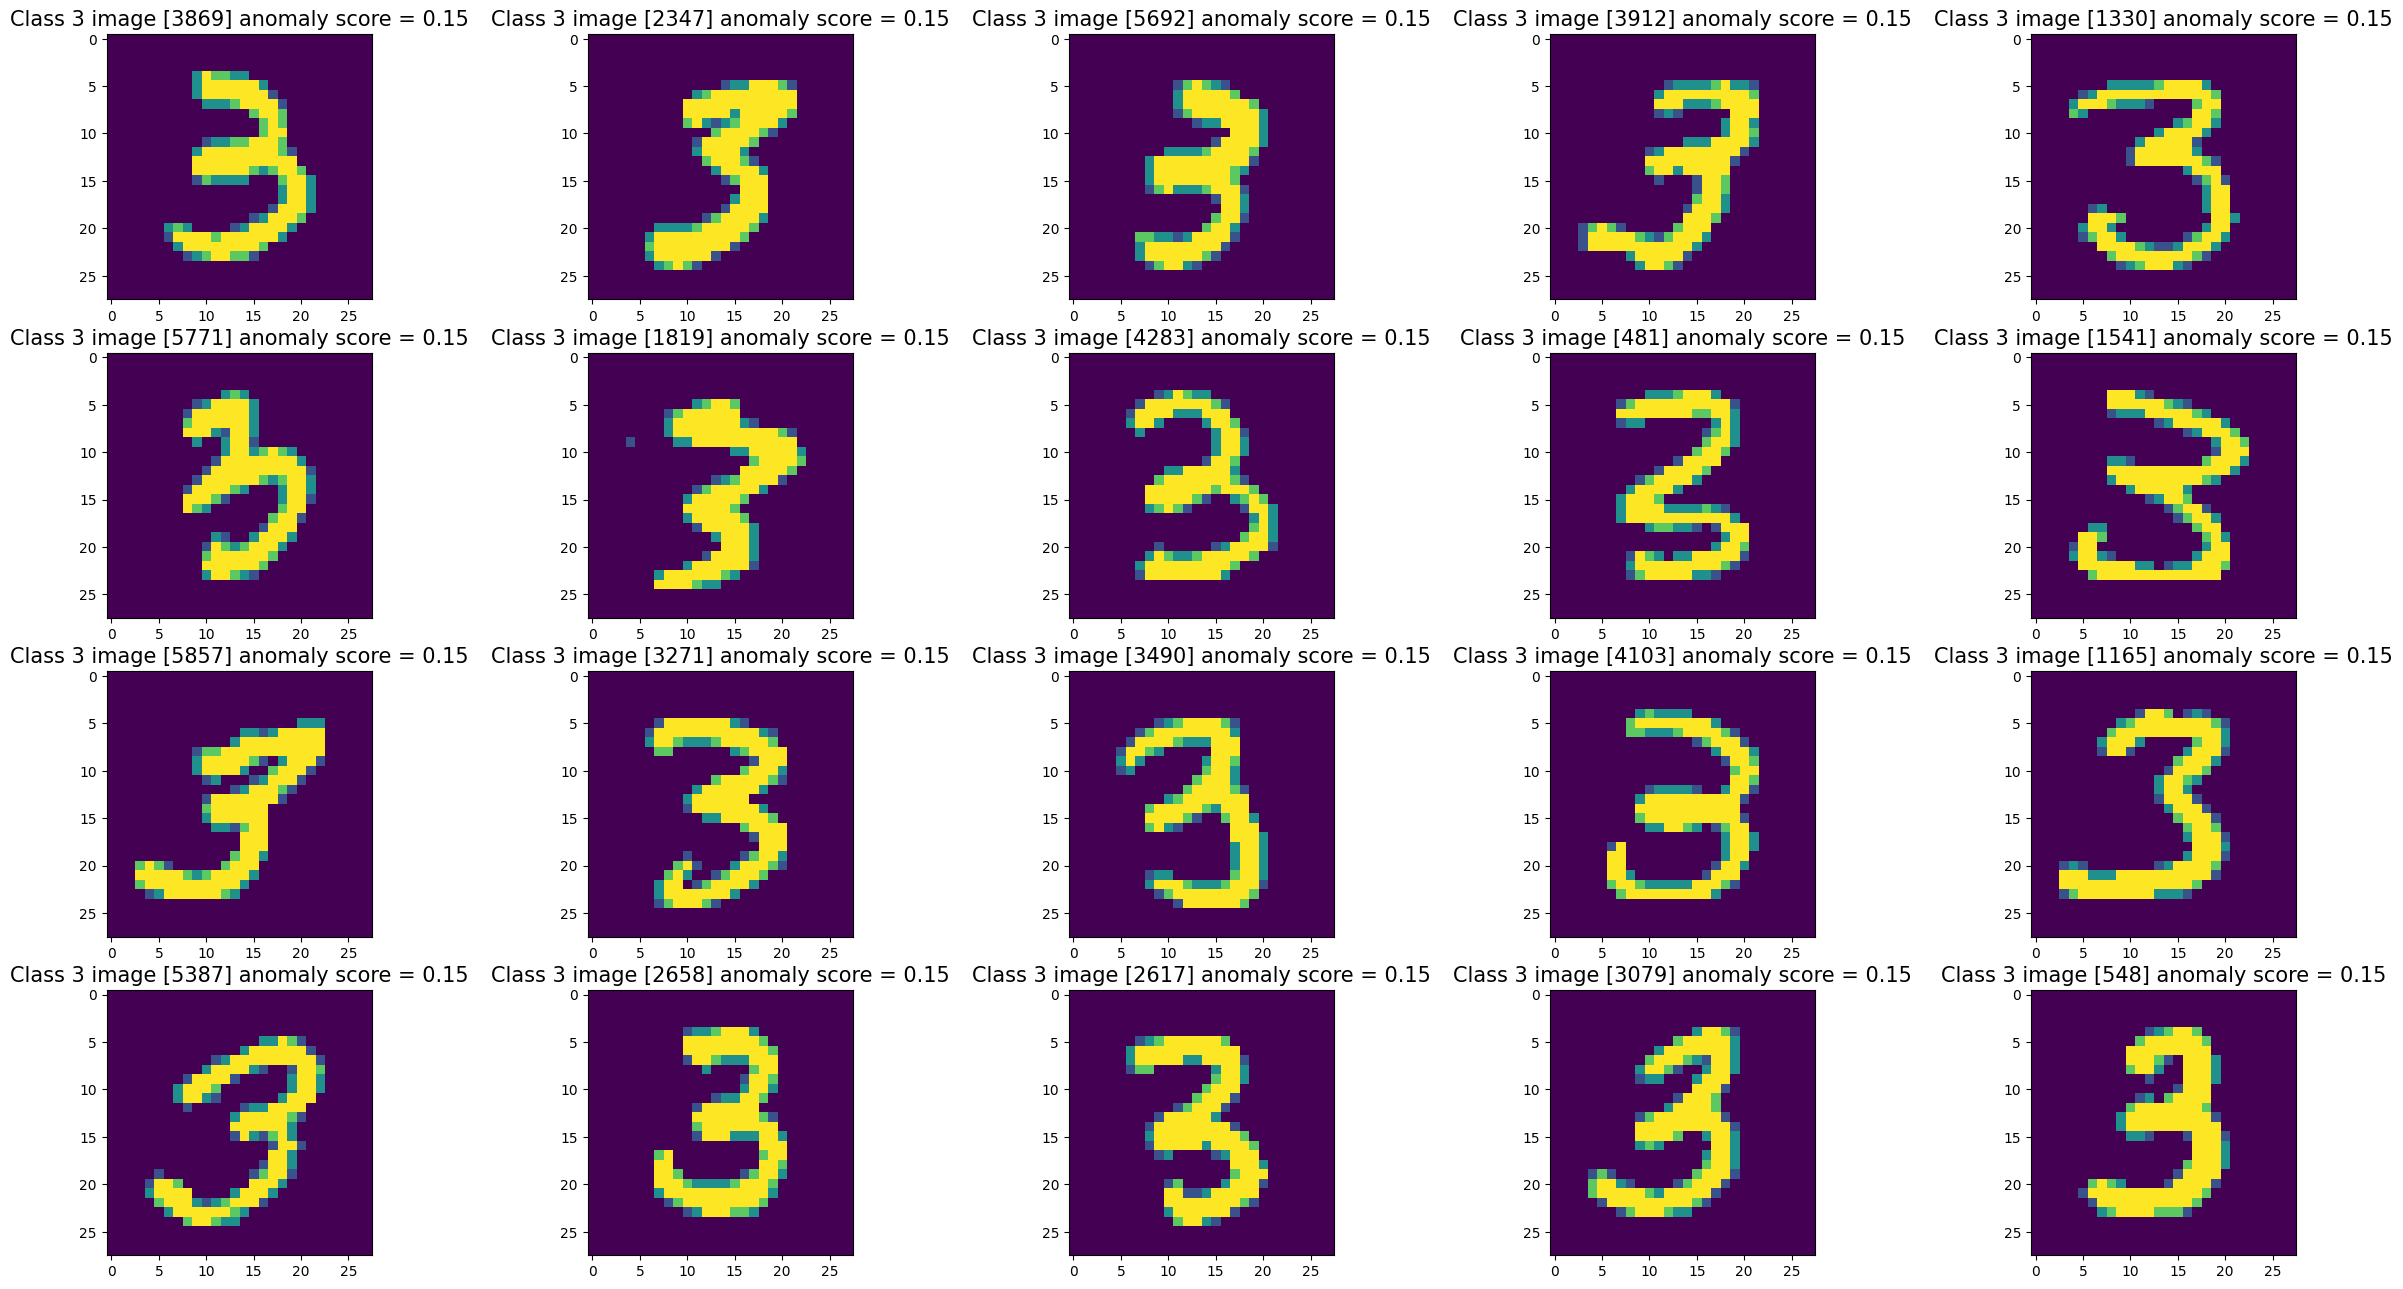

In [23]:
# draw best sample
# lets print some images with most anomaly
images_show = []
titles_show = []
for i in range(0, 20):
    index = anomaly_score_indices[len(anomaly_score_indices)-i-1]
    images_show.append(desired_class_x[index])
    titles_show.append('Class ' + str(desired_class) + ' image [' + str(index) + '] anomaly score = ' + "{:.2f}".format(round(anomaly_scores[index], 2))) 
    
show_images(images_show, titles_show)